In [2]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd

In [3]:
files = [file for file in os.listdir('exhaustive_landscapes_treat_infection/') if 'results' in file]
q1_range = 1-np.logspace(-6,-3,100)
u1_range = 1-q1_range

In [4]:
all_along_u1 = []
all_params = []

for i in range(len(files)):
    with open('exhaustive_landscapes_treat_infection/'+files[i], 'rb') as f:
        result = pickle.load(f)

    dict_vs_u1 = {}

    for t in result:
        dict_vs_u1[t['u1']] = np.array([t['Y00'], t['Y01'], t['Y10'], t['Y11']])

    along_u1 = np.array([dict_vs_u1[u1] for u1 in u1_range])
    
    all_params.append({'m':result[i]['m'], 'a1':result[i]['a1'], 'landscape':result[i]['landscape']})
    all_along_u1.append(along_u1)

In [5]:
all_landscapes = list(set([all_params[n]['landscape'] for n in range(len(all_params))]))

In [6]:
def find_nearest_value(array):
    differences = np.array(array) - array[0]
    return(np.searchsorted(-differences, 0))

In [7]:
params_legend = ['($s_{01}$, $s_{10}$, $s_{11}$) = (0,0,0)',
                 '($s_{01}$, $s_{10}$, $s_{11}$) = (-1,-1,1)',
                 '($s_{01}$, $s_{10}$, $s_{11}$) = (-1,-1,-1)',
                 '($s_{01}$, $s_{10}$, $s_{11}$) = (1,1,1)',
                 '($s_{01}$, $s_{10}$, $s_{11}$) = (0,0,1)']

In [8]:
all_titles = {(0,0,0): ['$Y_{00}$ ($b_{00}$ = 7.61)', '$Y_{01}$ ($b_{01}$ = $b_{00}$)', 
                        '$Y_{10}$ ($b_{10}$ = $b_{00}$)', '$Y_{11}$ ($b_{11}$ = $b_{00}$)'],
              (-1,-1,1): ['$Y_{00}$ ($b_{00}$ = 7.61)', '$Y_{01}$ ($b_{01}$ = 0.99 ∙ $b_{00}$)', 
                        '$Y_{10}$ ($b_{10}$ = 0.99 ∙ $b_{00}$)', '$Y_{11}$ ($b_{11}$ = 1.01 ∙ $b_{00}$)'],
              (-1,-1,-1): ['$Y_{00}$ ($b_{00}$ = 7.61)', '$Y_{01}$ ($b_{01}$ = 0.99 ∙ $b_{00}$)', 
                        '$Y_{10}$ ($b_{10}$ = 0.99 ∙ $b_{00}$)', '$Y_{11}$ ($b_{11}$ = 0.99 ∙ $b_{00}$)'],
              (1,1,1): ['$Y_{00}$ ($b_{00}$ = 7.61)', '$Y_{01}$ ($b_{01}$ = 1.01 ∙ $b_{00}$)', 
                        '$Y_{10}$ ($b_{10}$ = 1.01 ∙ $b_{00}$)', '$Y_{11}$ ($b_{11}$ = 1.01 ∙ $b_{00}$)'],
              (0,0,1): ['$Y_{00}$ ($b_{00}$ = 7.61)', '$Y_{01}$ ($b_{01}$ = $b_{00}$)', 
                        '$Y_{10}$ ($b_{10}$ = $b_{00}$)', '$Y_{11}$ ($b_{11}$ = 1.01 ∙ $b_{00}$)']}

In [9]:
all_titles = ['$Y_{00}$', '$Y_{01}$ + $Y_{10}$ + $Y_{11}$', '$Y_{01}$', '$Y_{10}$', '$Y_{11}$']

In [10]:
considered_landscapes = [(0,0,0),(-1,-1,1),(-1,-1,-1),(1,1,1),(0,0,1)]

In [11]:
translation_j = {0:0, 2:1, 3:2, 4:3}

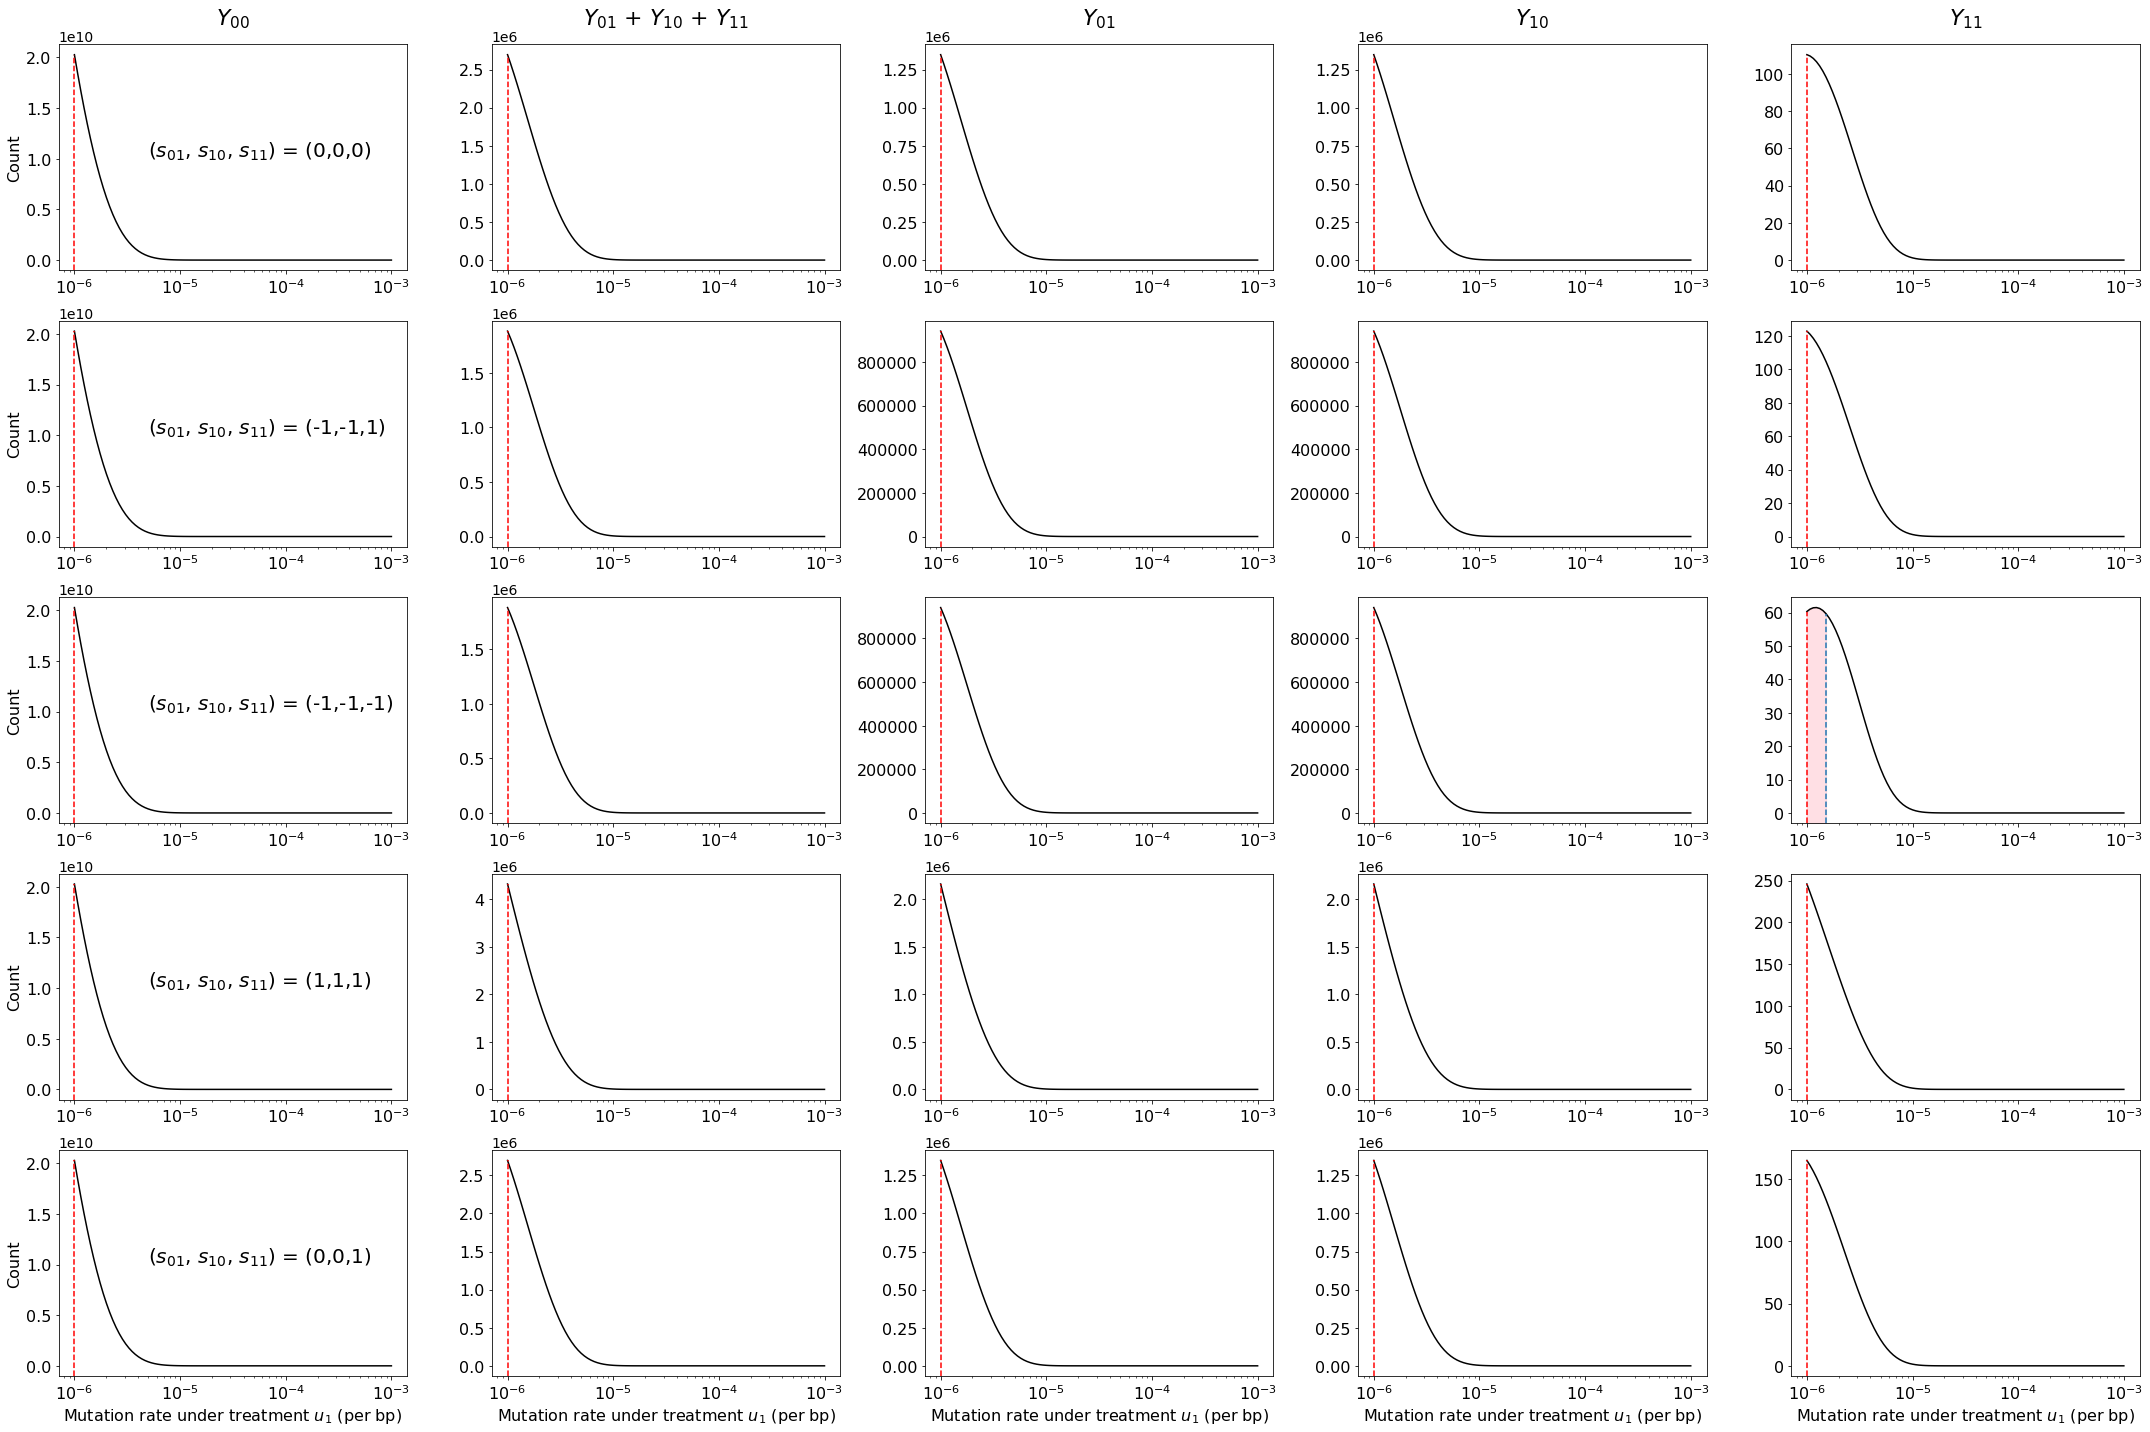

In [19]:
fig, ax = plt.subplots(5,5, figsize = (30,20))

for i in range(5):
    
    all_rows = [all_params.index({'m':20000, 'a1':7.7, 'landscape':considered_landscapes[L]}) for L in range(5)]
    
    for j in [0,2,3,4]:
        ax[i,j].plot(u1_range, all_along_u1[all_rows[i]][:,translation_j[j]], c = 'k')
        ylim_coor = ax[i,j].get_ylim()
        ymax_notreat = (all_along_u1[all_rows[i]][:,translation_j[j]][0]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0])
        ax[i,j].axvline(1e-6, ymax = ymax_notreat, c='r', linestyle='dashed')
        nearest_noadv = find_nearest_value(all_along_u1[all_rows[i]][:,translation_j[j]])
        if nearest_noadv > 0:
            ax[i,j].axvline(u1_range[nearest_noadv], ymax = (all_along_u1[all_rows[i]][:,translation_j[j]][nearest_noadv]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C0',linestyle='dashed')
            ax[i,j].fill_between(u1_range[:nearest_noadv+1], ylim_coor[0]-1, all_along_u1[all_rows[i]][:,translation_j[j]][:nearest_noadv+1], color = 'pink', alpha = 0.5, interpolate = True)
            ax[i,j].set_ylim(ylim_coor[0], ylim_coor[1])
    ylim_coor = ax[i,0].get_ylim()
    ax[i,0].text(5e-6, np.sum(ylim_coor)/2, params_legend[i], fontsize = 20)    
    sum_SM = np.sum(all_along_u1[all_rows[i]][:,1:3], axis = 1)
    ax[i,1].plot(u1_range, sum_SM, c = 'k')
    ylim_coor = ax[i,1].get_ylim()
    ymax_notreat = (sum_SM[0]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0])
    ax[i,1].axvline(1e-6, ymax = ymax_notreat, c='r', linestyle='dashed')
    nearest_noadv = find_nearest_value(sum_SM)
    if nearest_noadv > 0:
        ax[i,1].axvline(u1_range[nearest_noadv], ymax = (sum_SM[nearest_noadv]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C0',linestyle='dashed')
        ax[i,1].fill_between(u1_range[:nearest_noadv+1], ylim_coor[0]-1, sum_SM[:nearest_noadv+1], color = 'pink', alpha = 0.5, interpolate = True)
        ax[i,1].set_ylim(ylim_coor[0], ylim_coor[1])

for i in range(5):
    for j in range(5):
        ax[i,j].set_xscale('log')
        ax[i,j].tick_params(labelsize = 16)
        ax[i,j].yaxis.get_offset_text().set_fontsize(14)
        ax[4,j].set_xlabel('Mutation rate under treatment $u_1$ (per bp)', fontsize = 16)
        ax[i,0].set_ylabel('Count', fontsize = 16)
        ax[0,j].set_title(all_titles[j], fontsize = 22, pad = 20)


plt.tight_layout()
plt.savefig('new_figure_landscape_infection_m20000a177_AUG3.tiff', dpi=600, bbox_inches = 'tight')

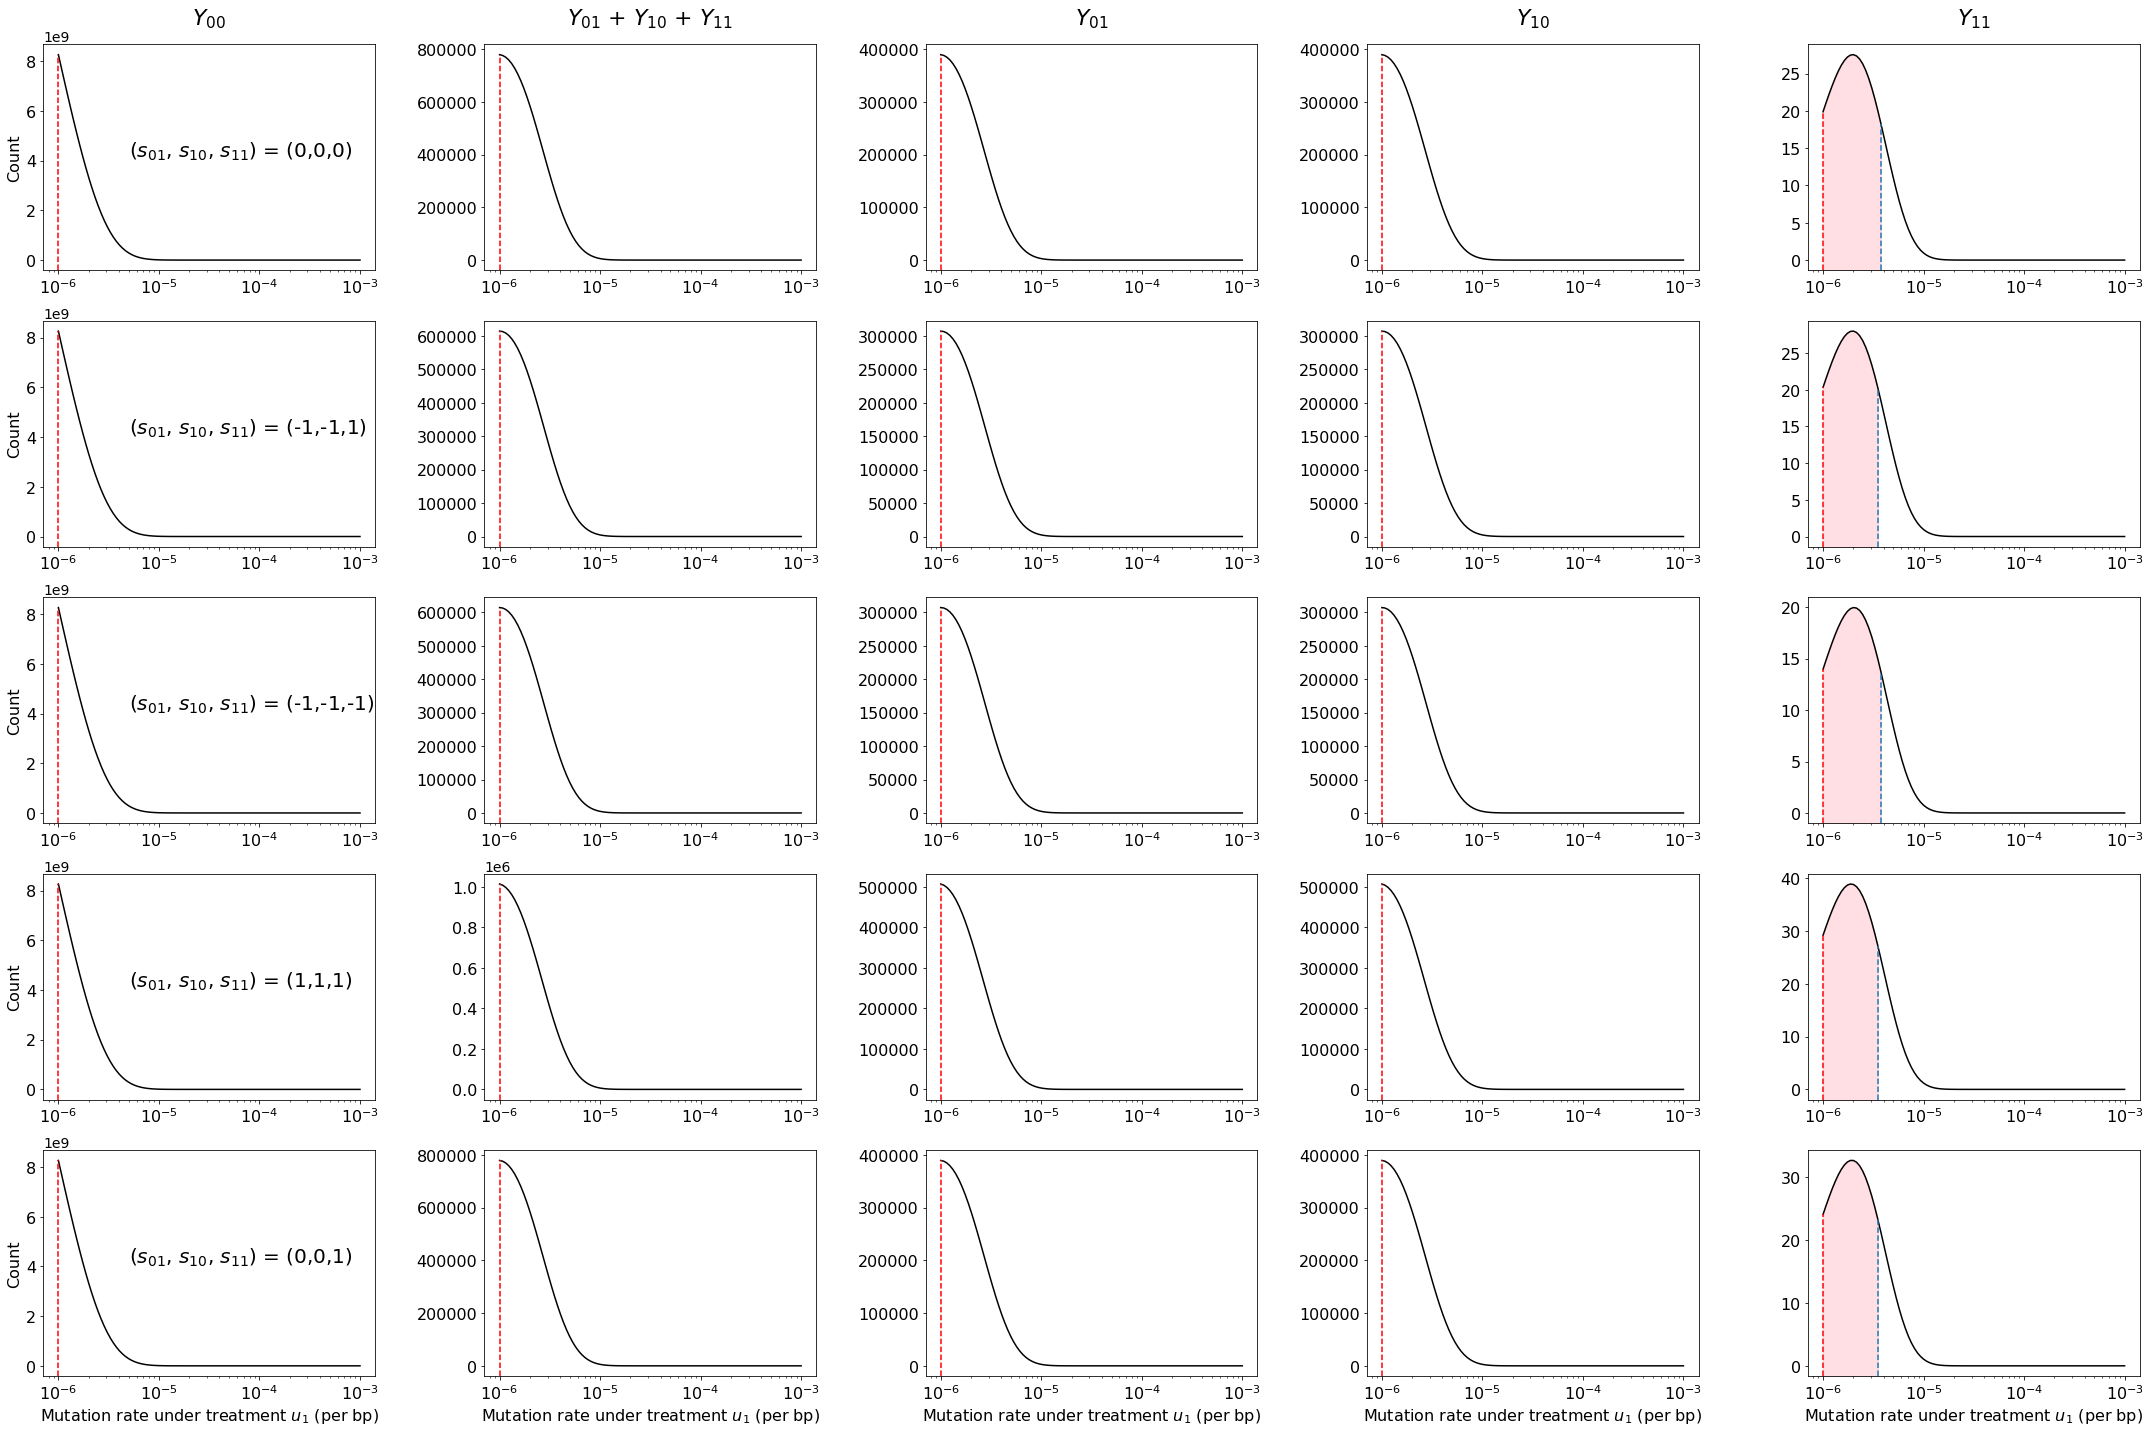

In [17]:
fig, ax = plt.subplots(5,5, figsize = (30,20))

for i in range(5):
    
    all_rows = [all_params.index({'m':20000, 'a1':8.1, 'landscape':considered_landscapes[L]}) for L in range(5)]
    
    for j in [0,2,3,4]:
        ax[i,j].plot(u1_range, all_along_u1[all_rows[i]][:,translation_j[j]], c = 'k')
        ylim_coor = ax[i,j].get_ylim()
        ymax_notreat = (all_along_u1[all_rows[i]][:,translation_j[j]][0]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0])
        ax[i,j].axvline(1e-6, ymax = ymax_notreat, c='r', linestyle='dashed')
        nearest_noadv = find_nearest_value(all_along_u1[all_rows[i]][:,translation_j[j]])
        if nearest_noadv > 0:
            ax[i,j].axvline(u1_range[nearest_noadv], ymax = (all_along_u1[all_rows[i]][:,translation_j[j]][nearest_noadv]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C0',linestyle='dashed')
            ax[i,j].fill_between(u1_range[:nearest_noadv+1], ylim_coor[0]-1, all_along_u1[all_rows[i]][:,translation_j[j]][:nearest_noadv+1], color = 'pink', alpha = 0.5, interpolate = True)
            ax[i,j].set_ylim(ylim_coor[0], ylim_coor[1])
    ylim_coor = ax[i,0].get_ylim()
    ax[i,0].text(5e-6, np.sum(ylim_coor)/2, params_legend[i], fontsize = 20)    
    sum_SM = np.sum(all_along_u1[all_rows[i]][:,1:3], axis = 1)
    ax[i,1].plot(u1_range, sum_SM, c = 'k')
    ylim_coor = ax[i,1].get_ylim()
    ymax_notreat = (sum_SM[0]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0])
    ax[i,1].axvline(1e-6, ymax = ymax_notreat, c='r', linestyle='dashed')
    nearest_noadv = find_nearest_value(sum_SM)
    if nearest_noadv > 0:
        ax[i,1].axvline(u1_range[nearest_noadv], ymax = (sum_SM[nearest_noadv]-ylim_coor[0])/(ylim_coor[1]-ylim_coor[0]), c='C0',linestyle='dashed')
        ax[i,1].fill_between(u1_range[:nearest_noadv+1], ylim_coor[0]-1, sum_SM[:nearest_noadv+1], color = 'pink', alpha = 0.5, interpolate = True)
        ax[i,1].set_ylim(ylim_coor[0], ylim_coor[1])

for i in range(5):
    for j in range(5):
        ax[i,j].set_xscale('log')
        ax[i,j].tick_params(labelsize = 16)
        ax[i,j].yaxis.get_offset_text().set_fontsize(14)
        ax[4,j].set_xlabel('Mutation rate under treatment $u_1$ (per bp)', fontsize = 16)
        ax[i,0].set_ylabel('Count', fontsize = 16)
        ax[0,j].set_title(all_titles[j], fontsize = 22, pad = 20)


plt.tight_layout()
plt.savefig('new_figure_landscape_infection_m20000a181_AUG3.tiff', dpi=600, bbox_inches = 'tight')